<h1>TASK 2: CREDIT CARD FRAUD DETECTION</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd = pd.read_csv(r"C:\Users\HP\Downloads\credit card\fraudTrain.csv")
cd

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [3]:
cd = cd.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last',
              'gender', 'street', 'city', 'state', 'zip', 'dob', 'job', 'category', 'unix_time'], axis=1)


In [4]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   amt         1296675 non-null  float64
 1   lat         1296675 non-null  float64
 2   long        1296675 non-null  float64
 3   city_pop    1296675 non-null  int64  
 4   trans_num   1296675 non-null  object 
 5   merch_lat   1296675 non-null  float64
 6   merch_long  1296675 non-null  float64
 7   is_fraud    1296675 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 79.1+ MB


In [5]:
cd.dtypes

amt           float64
lat           float64
long          float64
city_pop        int64
trans_num      object
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object

In [6]:
cd.isnull().sum()

amt           0
lat           0
long          0
city_pop      0
trans_num     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


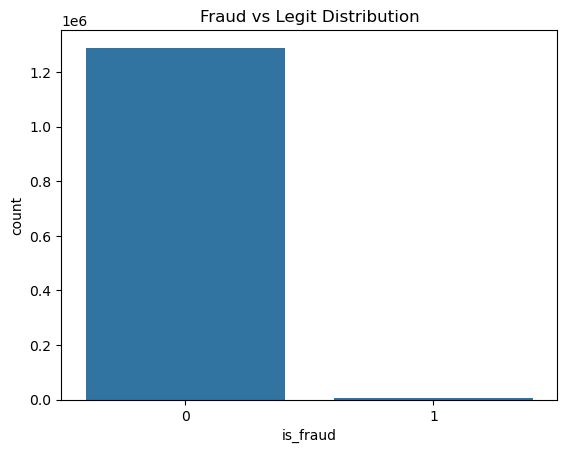

In [7]:
print(cd['is_fraud'].value_counts())
sns.countplot(x='is_fraud', data=cd)
plt.title("Fraud vs Legit Distribution")
plt.show()


In [9]:
cd = cd.select_dtypes(include=['number'])  

X = cd.drop('is_fraud', axis=1)
y = cd['is_fraud']


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("🔹 Logistic Regression Results 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))



🔹 Logistic Regression Results 🔹
Accuracy: 0.9935835887944164
Confusion Matrix:
 [[257671    144]
 [  1520      0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.00      0.00      0.00      1520

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



In [13]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy', random_state=42)
dtree.fit(X_train, y_train)
y_pred_tree = dtree.predict(X_test)
print("🌳 Decision Tree Results 🌳")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))



🌳 Decision Tree Results 🌳
Accuracy: 0.9920141901401662
Confusion Matrix:
 [[256748   1067]
 [  1004    516]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.33      0.34      0.33      1520

    accuracy                           0.99    259335
   macro avg       0.66      0.67      0.66    259335
weighted avg       0.99      0.99      0.99    259335



In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("🌲 Random Forest Results 🌲")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


🌲 Random Forest Results 🌲
Accuracy: 0.9948406501243565
Confusion Matrix:
 [[257622    193]
 [  1145    375]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.66      0.25      0.36      1520

    accuracy                           0.99    259335
   macro avg       0.83      0.62      0.68    259335
weighted avg       0.99      0.99      0.99    259335

